## Importing libraries:
The code imports necessary libraries for data analysis and visualization, such as pandas, seaborn, matplotlib, %matplotlib inline (to display plots in Jupyter Notebook), and specific modules and functions from scikit-learn (sklearn) for machine learning tasks.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Loading and Exploring the Iris Dataset:
The code loads the Iris dataset from the CSV file "Iris.csv" into a pandas DataFrame named df.
It prints the first 10 rows of the dataset using df.head(10).

In [29]:
df =pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


It checks the shape, columns, and information of the dataset using df.shape, df.columns, and df.info() respectively.

In [30]:
df.shape

(150, 6)

In [31]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


It generates basic statistics of the dataset using df.describe().

In [33]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


It checks for any missing values in the dataset using df.isnull().sum().

In [34]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Visualization:
The code performs several data visualizations using seaborn and matplotlib to gain insights into the dataset and the relationships between features.
It creates a pair plot to visualize pairwise relationships between features and uses 'Species' as a hue to distinguish different classes (Iris species).
It creates scatter plots and violin plots to visualize the distributions of different features with respect to the 'Species' class.

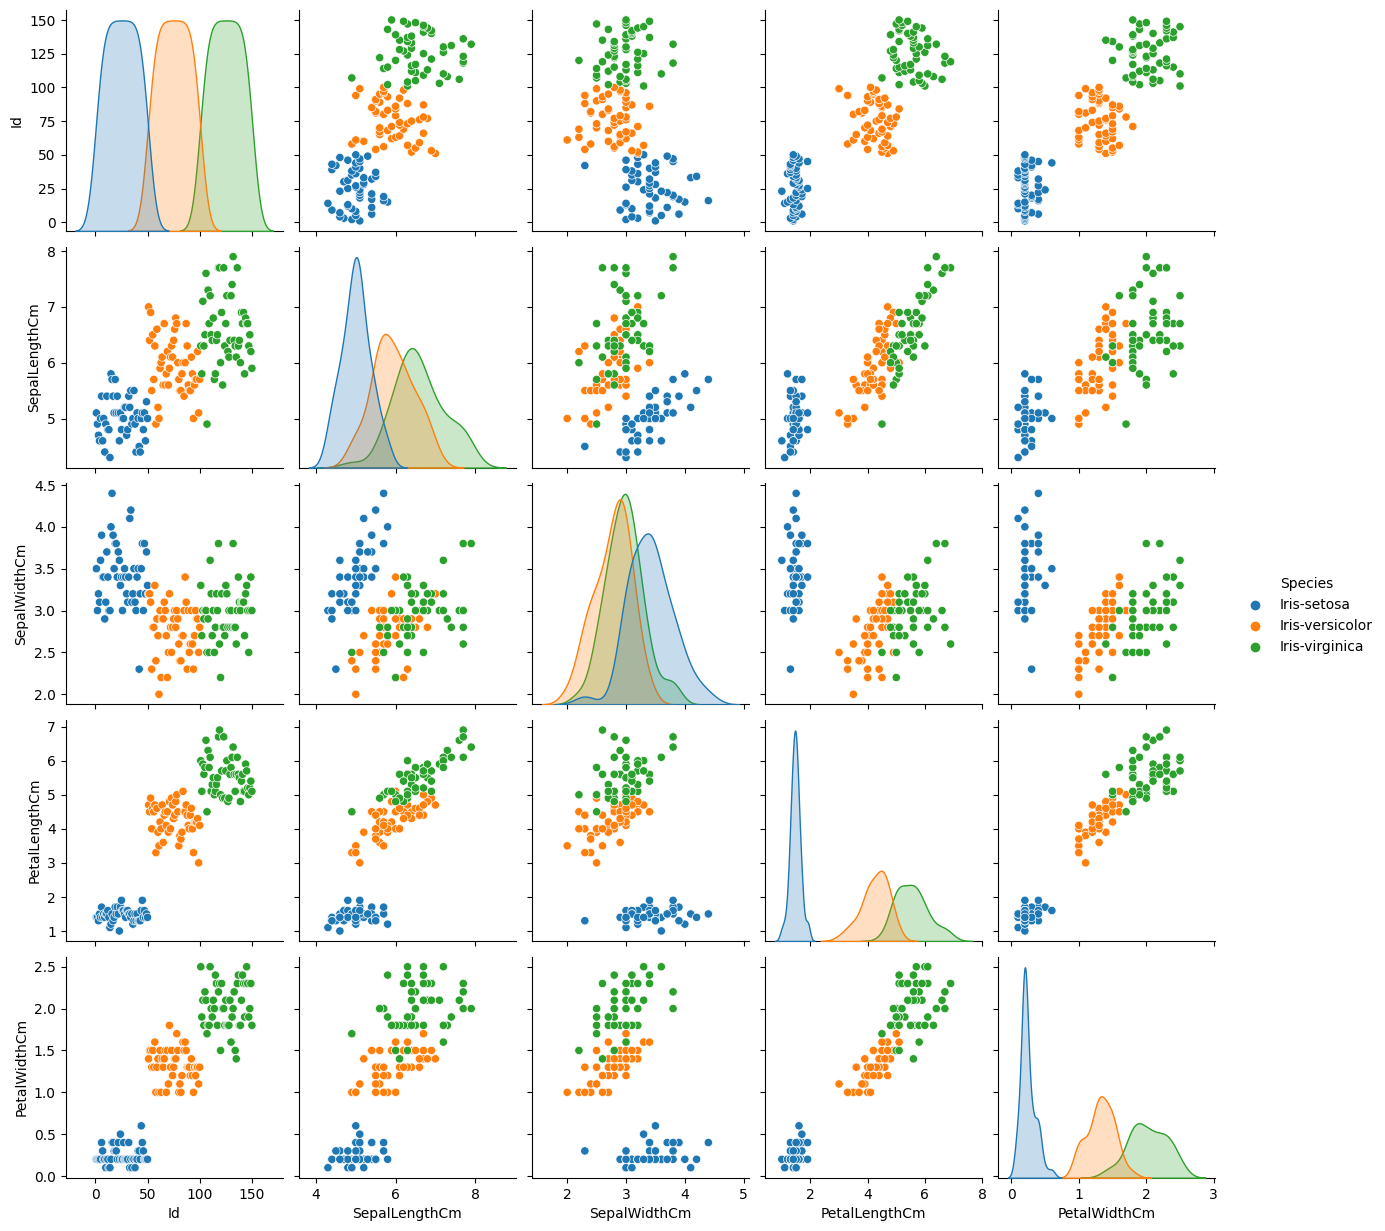

In [37]:
sns.pairplot(df,hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

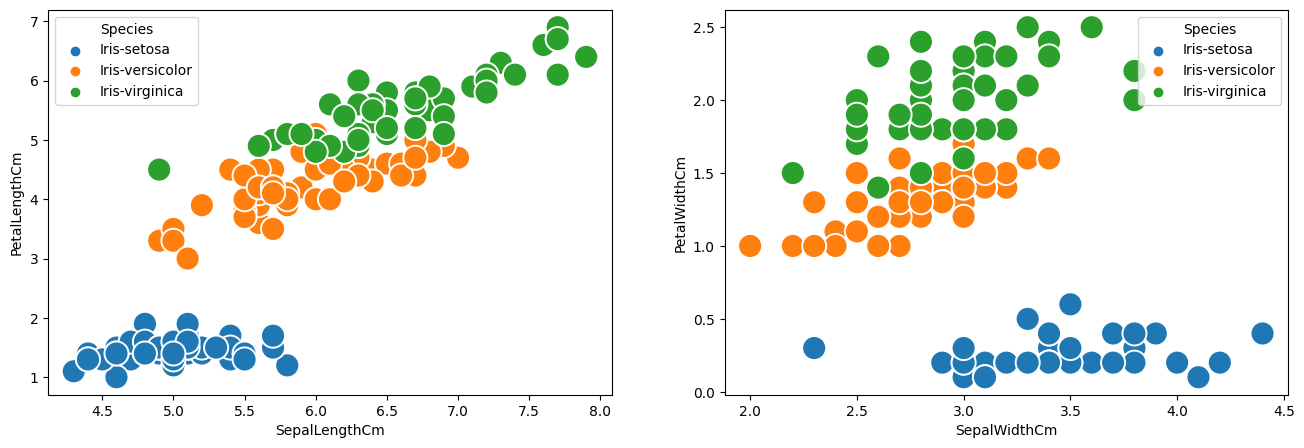

In [38]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species',ax=ax2,s=300,marker='o')

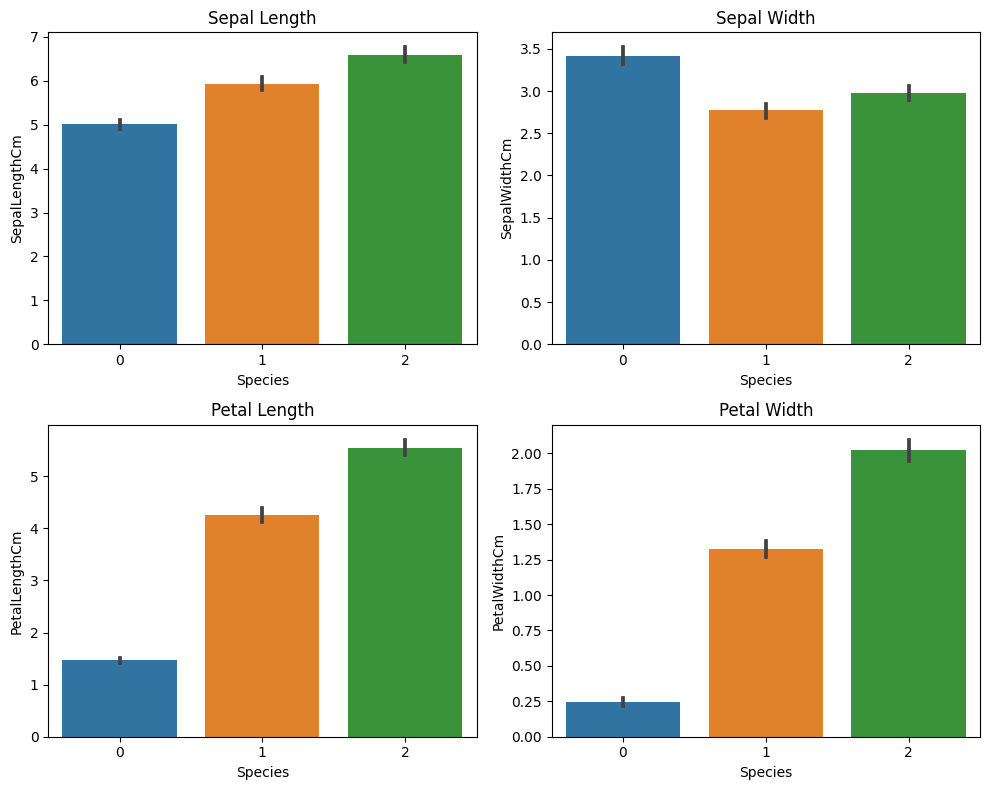

In [49]:
 #Create a figure with multiple axes (subplots)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Bar plot for Sepal Length
sns.barplot(x='Species', y='SepalLengthCm', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

# Bar plot for Sepal Width
sns.barplot(x='Species', y='SepalWidthCm', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

# Bar plot for Petal Length
sns.barplot(x='Species', y='PetalLengthCm', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

# Bar plot for Petal Width
sns.barplot(x='Species', y='PetalWidthCm', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

<Axes: ylabel='count'>

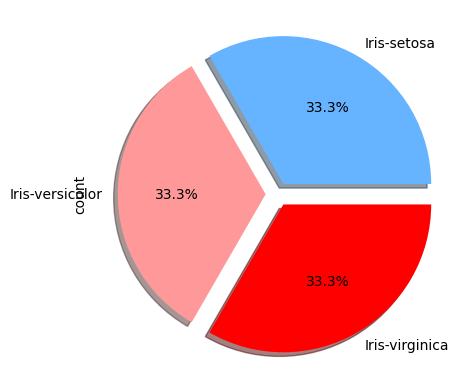

In [40]:
colors = ['#66b3ff','#ff9999','red']
df['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

## Data Preprocessing:
The code converts the 'Species' column from categorical text labels to numeric codes using .astype('category').cat.codes.
It separates the features (X) and the target variable (y) from the dataset for the machine learning task.

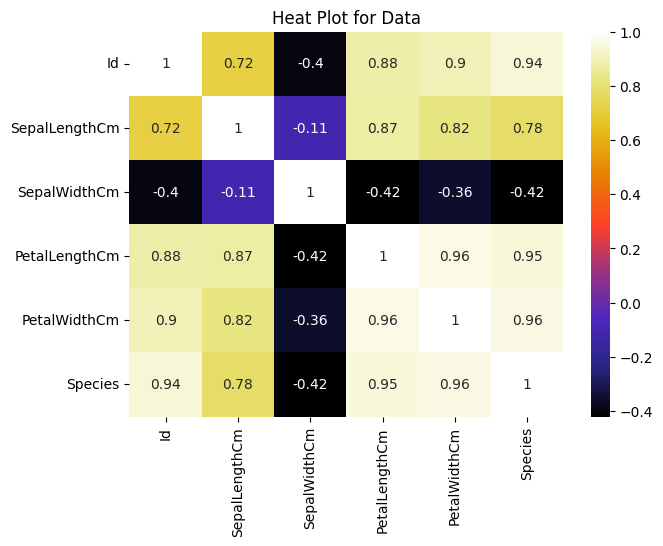

In [41]:
df['Species'] = df['Species'].astype('category').cat.codes
numeric_df = df.drop('Species', axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot for Data')
plt.show()

In [42]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df.loc[:, features].values   #defining the feature matrix
y = df.Species

## Training a Decision Tree Classifier:
The code splits the dataset into training and test sets using train_test_split() from scikit-learn.
It creates a DecisionTreeClassifier with a random state and fits it to the training set using fit().
The code visualizes the decision tree using tree.plot_tree() from scikit-learn.

In [43]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

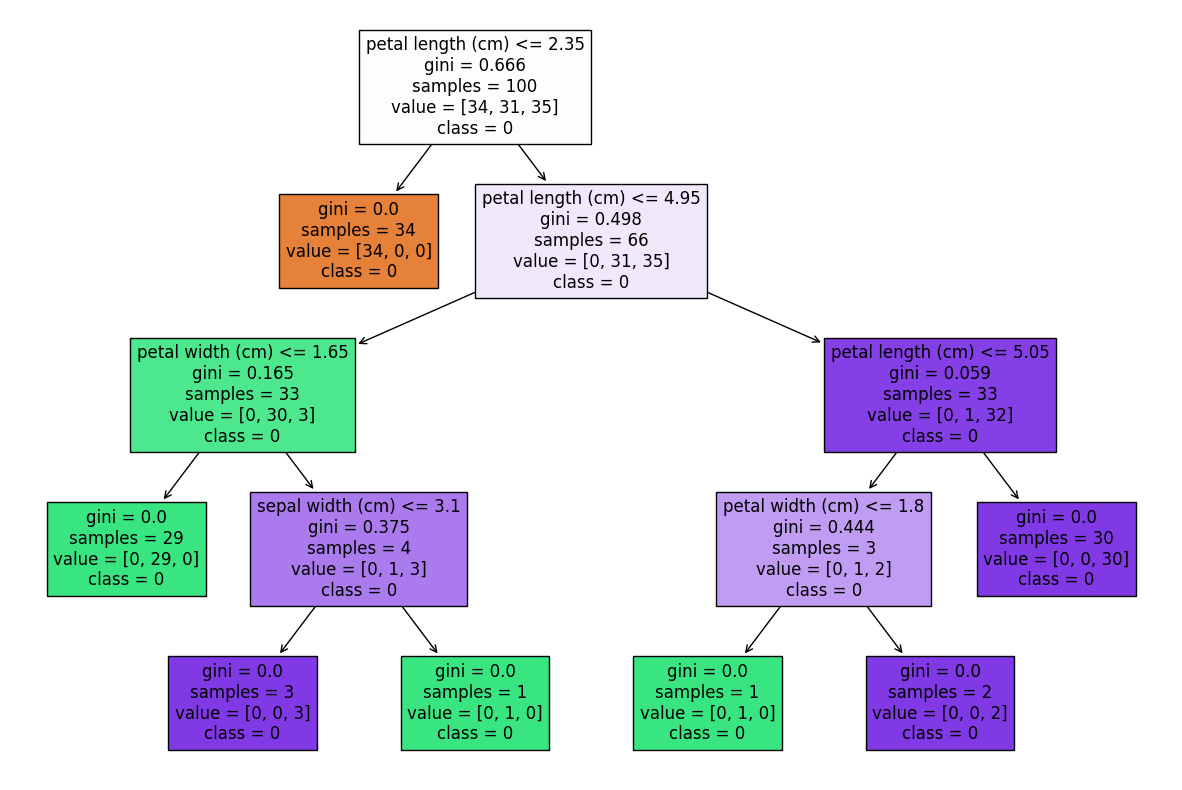

In [44]:
#Visualizing the decision tree
from sklearn import tree
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_names = [str(cls) for cls in df.Species]
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

## Making Predictions and Evaluating the Model:
The code uses the trained classifier to make predictions on the test set using predict().
It calculates the accuracy of the model using accuracy_score() from scikit-learn and prints the accuracy score.

In [45]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2], dtype=int8)

In [46]:
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.96


## Classification Report and Confusion Matrix:
The code defines a function report(model) to generate a classification report and confusion matrix for the model's predictions on the test set.
It calls this function with the trained classifier to print the classification report and display the confusion matrix using seaborn heatmap.

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds, y_test))
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(7, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

## Printing the Accuracy:
The code prints the accuracy of the decision tree classifier using the accuracy_score calculated earlier.

Decision Tree Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



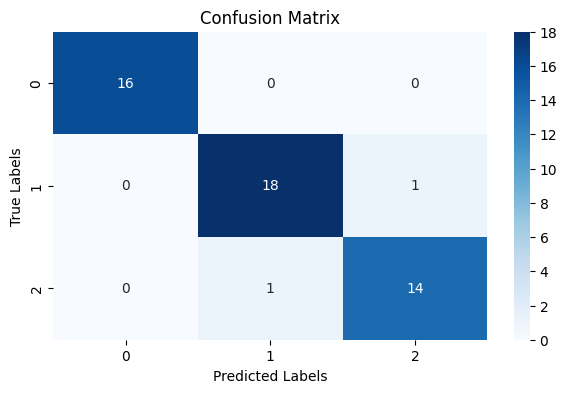

Accuracy: 96.0%


In [48]:
print('Decision Tree Classifier')
report(clf)
print(f'Accuracy: {round(score*100,2)}%')

The code essentially loads the Iris dataset, performs data visualization to understand the relationships between features and target variable, trains a decision tree classifier on the dataset, and evaluates the classifier's performance on the test set. The final output includes the accuracy score of the classifier and visualizations of the decision tree, classification report, and confusion matrix.